In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [12]:
who_df = pd.read_csv('who_data.csv')
who_df.head()

,country,code,region,income,year,che_gdp,che_pc_usd,dis23_che,pop,Difference in POP,Population Growth Rate(%),che_usd,dis23_usd_pc,pfc_usd_pc
0,Algeria,DZA,AFR,Lower-middle,2000,3.5,62,NaN,"30,775",NaN,NaN,"1,912",NaN,740
1,Algeria,DZA,AFR,Lower-middle,2001,3.8,67,NaN,"31,201",426,1.39,"2,101",NaN,767
2,Algeria,DZA,AFR,Lower-middle,2002,3.7,67,NaN,"31,625",424,1.36,"2,117",NaN,789
3,Algeria,DZA,AFR,Lower-middle,2003,3.6,76,NaN,"32,056",431,1.36,"2,444",NaN,857
4,Algeria,DZA,AFR,Lower-middle,2004,3.5,93,NaN,"32,510",454,1.42,"3,024",NaN,"1,012"


In [13]:
who_df.rename(columns={'Column1':'Population Growth Rate(%)','che_gdp':'Current Health Expenditure % of GDP',
                       'che_pc_usd':'Current Health Expenditure Per Capita (USD)',
                       'dis23_che':'Expenditure on Contraceptive Management as % of Current Health Expenditure',
                      'pop':'Population(thousands)', 'che_usd':'Current Health Expenditure(millions USD)',
                      'dis23_usd_pc':'Contraceptive Management Per Capita (USD)',
                      'pfc_usd_pc':'Consumption Expenditure Per Capita(USD)'},inplace=True)



In [14]:
who_df.replace(',','', regex=True, inplace=True)

In [15]:
who_df.head()

,country,code,region,income,year,Current Health Expenditure % of GDP,Current Health Expenditure Per Capita (USD),Expenditure on Contraceptive Management as % of Current Health Expenditure,Population(thousands),Difference in POP,Population Growth Rate(%),Current Health Expenditure(millions USD),Contraceptive Management Per Capita (USD),Consumption Expenditure Per Capita(USD)
0,Algeria,DZA,AFR,Lower-middle,2000,3.5,62,NaN,30775,NaN,NaN,1912,NaN,740
1,Algeria,DZA,AFR,Lower-middle,2001,3.8,67,NaN,31201,426,1.39,2101,NaN,767
2,Algeria,DZA,AFR,Lower-middle,2002,3.7,67,NaN,31625,424,1.36,2117,NaN,789
3,Algeria,DZA,AFR,Lower-middle,2003,3.6,76,NaN,32056,431,1.36,2444,NaN,857
4,Algeria,DZA,AFR,Lower-middle,2004,3.5,93,NaN,32510,454,1.42,3024,NaN,1012


In [8]:
who_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 14 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   ï»¿country                                                                  4032 non-null   object 
 1   code                                                                        4032 non-null   object 
 2   region                                                                      4032 non-null   object 
 3   income                                                                      4032 non-null   object 
 4   year                                                                        4032 non-null   int64  
 5   Current Health Expenditure % of GDP                                         3960 non-null   float64
 6   Current Health Expenditure Per Capita (USD)     

In [16]:
who_df.iloc[:,4:]=who_df.iloc[:,4:].astype(np.float64,errors='ignore')
who_df.replace(',','', regex=True, inplace=True)

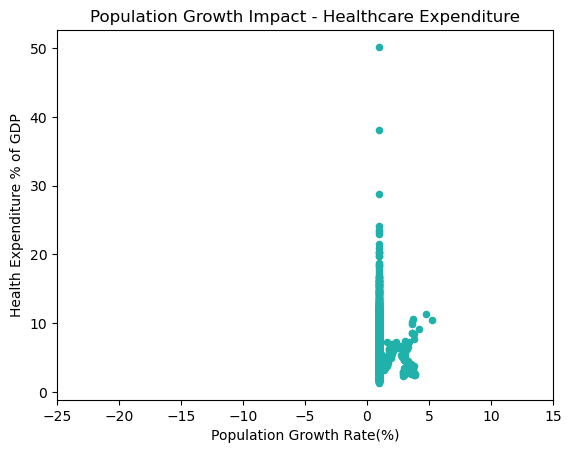

In [17]:
who_df.plot(
    x='Population Growth Rate(%)', 
    y='Current Health Expenditure % of GDP',
    kind ='scatter',color='lightseagreen',
    title = 'Population Growth Impact - Healthcare Expenditure',
    xlabel = 'Population Growth Rate(%)',
    ylabel = 'Health Expenditure % of GDP',
    xticks=np.arange(-25, 20,5)
    )
plt.savefig('Population Growth Impact - Healthcare Expenditure')
plt.show()

In [18]:
group_country_df = who_df.groupby(['country'])

group_country_df=group_country_df[['Population Growth Rate(%)', 'Current Health Expenditure % of GDP']].mean().reset_index()


In [19]:
five_high_country_df = group_country_df.sort_values('Current Health Expenditure % of GDP',ascending=False).head(5)
five_high_country_df

,country,Population Growth Rate(%),Current Health Expenditure % of GDP
125,Niue,1.0,16.033333
183,United States of America,1.0,15.576190
106,Marshall Islands,1.0,15.009524
176,Tuvalu,1.0,14.728571
118,Nauru,1.0,12.661905


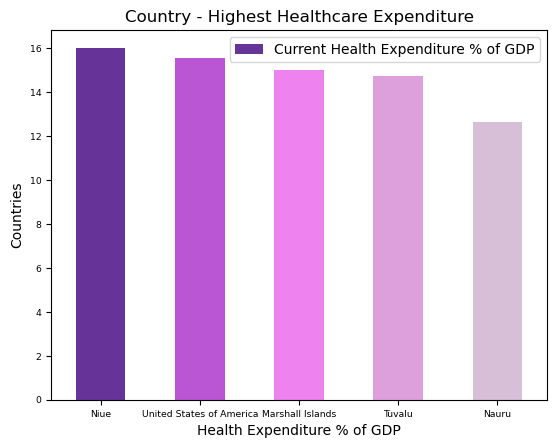

In [20]:
five_high_country_df.plot(
    x='country',
    y='Current Health Expenditure % of GDP',
    kind ='bar',color=tuple(["rebeccapurple", "mediumorchid","violet","plum","thistle"]),
    title = 'Country - Highest Healthcare Expenditure',
    xlabel = 'Health Expenditure % of GDP',fontsize = 6.7,
    ylabel = 'Countries',
)

plt.xticks(rotation=0)
plt.savefig('Country - Highest Healthcare Expenditure')
plt.show()

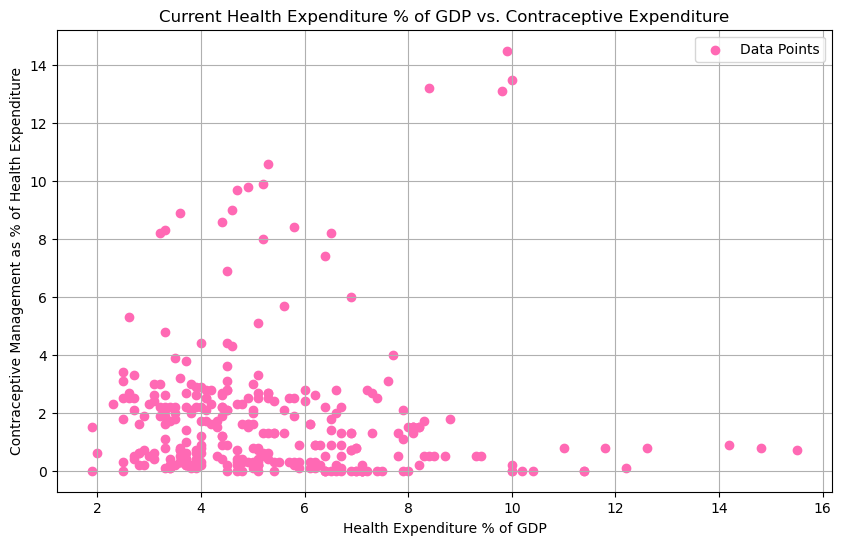

In [22]:
# Drop rows with NaN values in 'che_gdp' or 'dis23_che'
df_cleaned = who_df.dropna(subset=['Current Health Expenditure % of GDP', 'Expenditure on Contraceptive Management as % of Current Health Expenditure'])

# Define DataFrames for specific columns
gdp_df = pd.DataFrame({
    'country': df_cleaned['country'],
    'Current Health Expenditure % of GDP': df_cleaned['Current Health Expenditure % of GDP']
})

contraceptive_df = pd.DataFrame({
    'country': df_cleaned['country'],
    'Expenditure on Contraceptive Management as % of Current Health Expenditure': df_cleaned['Expenditure on Contraceptive Management as % of Current Health Expenditure']
})

# Calculate mode for 'che_gdp' and 'dis23_che'
mode_che_gdp = gdp_df['Current Health Expenditure % of GDP'].mode().values[0]
mode_dis23_che = contraceptive_df['Expenditure on Contraceptive Management as % of Current Health Expenditure'].mode().values[0]

# Scatter plot for Current Health Expenditure % of GDP
plt.figure(figsize=(10, 6))
plt.scatter(gdp_df['Current Health Expenditure % of GDP'], contraceptive_df['Expenditure on Contraceptive Management as % of Current Health Expenditure'], color='hotpink', label='Data Points')

# Plot the mode points
# plt.scatter(mode_Current Health Expenditure % of GDP', mode_Expenditure on Contraceptive Management as % of Current Health Expenditure, color='blue', label=f'Mode ({mode_Current Health Expenditure % of GDP:.2f}, {mode_Expenditure on Contraceptive Management as % of Current Health Expenditure:.2f})', s=100, marker='X'),
# plt.scatter(mode_che_gdp, mode_dis23_che, color='blue', label=f'Mode ({mode_che_gdp:.2f}, {mode_dis23_che:.2f})', s=100, marker='X')

plt.title('Current Health Expenditure % of GDP vs. Contraceptive Expenditure')
plt.xlabel('Health Expenditure % of GDP')
plt.ylabel('Contraceptive Management as % of Health Expenditure')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.savefig('che_gdp and dis23_che')
plt.show()

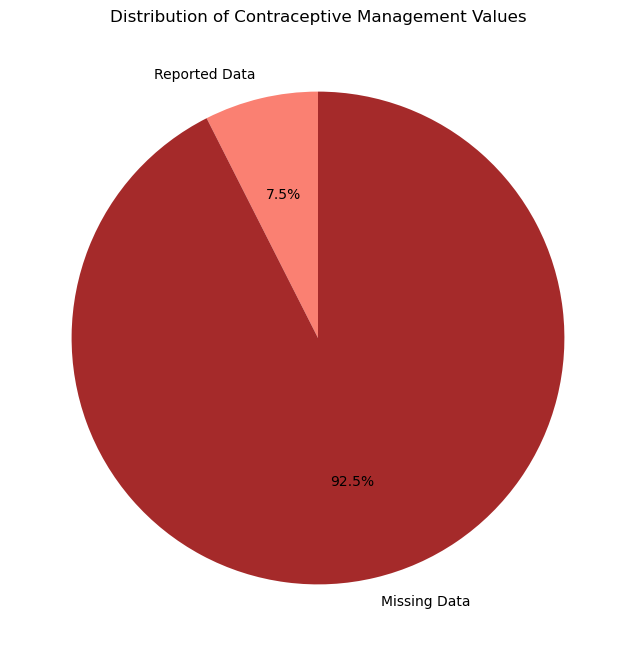

In [24]:
column_name = 'Expenditure on Contraceptive Management as % of Current Health Expenditure'

# Count the number of non-null and null values
non_null_count = who_df[column_name].count()
null_count = who_df[column_name].isnull().sum()

# Create a DataFrame for the pie chart
data = {'Labels': ['Reported Data', 'Missing Data'], 'Values': [non_null_count, null_count]}
df_pie = pd.DataFrame(data)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_pie['Values'], labels=df_pie['Labels'], autopct='%1.1f%%', startangle=90, colors=['salmon', 'brown'])
plt.title(f'Distribution of Contraceptive Management Values')
plt.savefig('Distribution of Contraceptive Management Values')
plt.show()

In [27]:
countries_df=who_df.set_index('country')

In [28]:
consumption_che_df=countries_df[['Current Health Expenditure % of GDP','Consumption Expenditure Per Capita(USD)']]
consumption=consumption_che_df.dropna(axis=0,how='any')
consumption=consumption.astype(np.float64)
consumption.head()

,Current Health Expenditure % of GDP,Consumption Expenditure Per Capita(USD)
country,,
Algeria,3.5,740.0
Algeria,3.8,767.0
Algeria,3.7,789.0
Algeria,3.6,857.0
Algeria,3.5,1012.0


In [29]:
def lin_regr_plt(data, x, y):
    plt.scatter(data[x], data[y], s=5)
    plt.title('Relationship Between % of GDP and Consumption Expenditure')
    plt.xlabel(x)
    plt.ylabel(y)
    print(stats.pearsonr(data[x], data[y]))

PearsonRResult(statistic=0.2463664274410931, pvalue=7.815289055736272e-56)


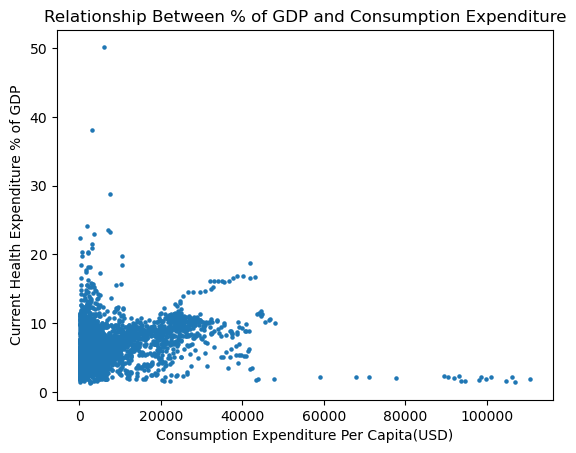

In [30]:
lin_regr_plt(consumption,'Consumption Expenditure Per Capita(USD)','Current Health Expenditure % of GDP')
plt.savefig('consumption_che_gdp_ind_pnt')

In [31]:
countries= pd.DataFrame(consumption.groupby('country')['Consumption Expenditure Per Capita(USD)'].mean())
countries['Current Health Expenditure % of GDP']=consumption.groupby('country')['Current Health Expenditure % of GDP'].mean()
countries

,Consumption Expenditure Per Capita(USD),Current Health Expenditure % of GDP
country,,
Afghanistan,288.894737,10.578947
Albania,2737.263158,6.089474
Algeria,1418.428571,5.033333
Andorra,23560.000000,6.523810
Angola,1264.857143,2.952381
...,...,...
Venezuela (Bolivarian Republic of),5153.095238,6.000000
Viet Nam,972.571429,4.414286
Yemen,803.000000,5.206250


PearsonRResult(statistic=0.270316129042483, pvalue=0.0001494447652371026)


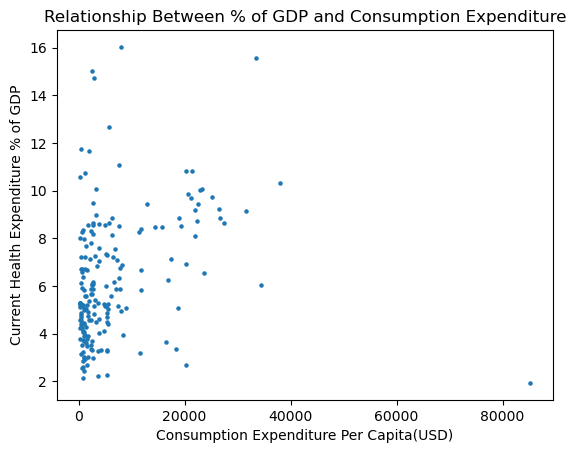

In [32]:
lin_regr_plt(countries,'Consumption Expenditure Per Capita(USD)','Current Health Expenditure % of GDP')
plt.savefig('consumption_che_gdp')

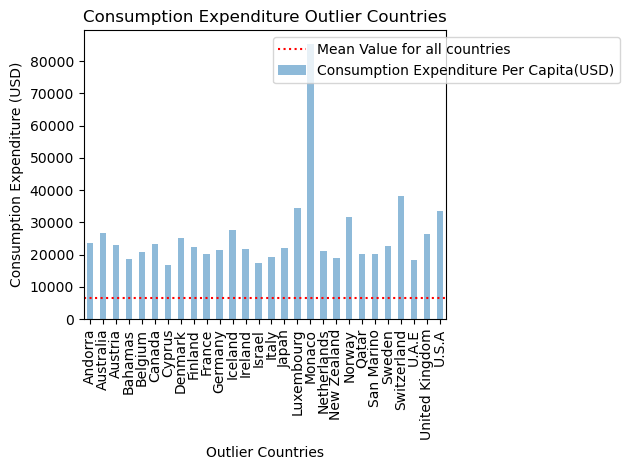

In [33]:
outliers = countries[countries['Consumption Expenditure Per Capita(USD)'] > countries['Consumption Expenditure Per Capita(USD)'].quantile(0.75) + 1.5 * (countries['Consumption Expenditure Per Capita(USD)'].quantile(0.75) - countries['Consumption Expenditure Per Capita(USD)'].quantile(0.25))]['Consumption Expenditure Per Capita(USD)']
outliers=pd.DataFrame(outliers)

outliers=outliers.rename({'Netherlands (Kingdom of the)':'Netherlands','United States of America':'U.S.A','United Arab Emirates':'U.A.E'})
che_outliers_bar=outliers.plot(kind='bar', xlabel='Outlier Countries',ylabel='Consumption Expenditure (USD)',title='Consumption Expenditure Outlier Countries', alpha=0.5)
plt.axhline(y=countries['Consumption Expenditure Per Capita(USD)'].mean(),color='r',linestyle=':',label='Mean Value for all countries')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper center') 
plt.tight_layout()

plt.savefig('che_outliers_bar')
plt.show()